In [1]:
import requests 
from bs4 import BeautifulSoup 
from tabulate import tabulate 
import os 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 
URL = 'https://www.mohfw.gov.in/'

SHORT_HEADERS = ['SNo', 'State', 
                'Confirmed','Cured','Death'] 

response = requests.get(URL).content 
soup = BeautifulSoup(response, 'html.parser') 
header = extract_contents(soup.tr.find_all('th')) 

stats = [] 
all_rows = soup.find_all('tr') 

for row in all_rows: 
    stat = extract_contents(row.find_all('td')) 
    if stat: 
        if len(stat) == 5: 
            # last row 
            stat = ['', *stat] 
            stats.append(stat) 
            elif len(stat) == 6: 
        stats.append(stat) 

stats[-1][1] = "Total Cases"

stats.remove(stats[-1]) 






In [3]:
objects = [] 
for row in stats : 
    objects.append(row[1]) 

y_pos = np.arange(len(objects)) 

performance = [] 
for row in stats : 
    performance.append(int(row[3]) + int(row[3])) 

table = tabulate(stats, headers=SHORT_HEADERS) 
print(table) 

      SNo  State                          Confirmed    Cured    Death
--  -----  ---------------------------  -----------  -------  -------
        1  Andaman and Nicobar Islands           33       33        0
        2  Andhra Pradesh                      2307     1252       48
        3  Arunachal Pradesh                      1        1        0
        4  Assam                                 90       41        2
        5  Bihar                               1018      438        7
        6  Chandigarh                           191       37        3
        7  Chhattisgarh                          66       56        0
        8  Dadar Nagar Haveli                     1        0        0
        9  Delhi                               8895     3518      123
       10  Goa                                   15        7        0
       11  Gujarat                             9931     4035      606
       12  Haryana                              818      439       11
       13  Himachal 

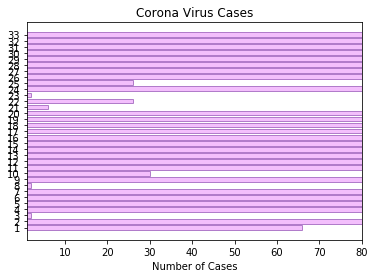

In [4]:
plt.barh(y_pos, performance, align='center', alpha=0.5, 
                color=(234/256.0, 128/256.0, 252/256.0), 
                edgecolor=(106/256.0, 27/256.0, 154/256.0)) 

plt.yticks(y_pos, objects) 
plt.xlim(1,80) 
plt.xlabel('Number of Cases') 
plt.title('Corona Virus Cases') 
plt.show() 
